In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install PIL
!{sys.executable} -m pip install scipy

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [2]:
# Install a pip package in the current Jupyter kernel


import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter


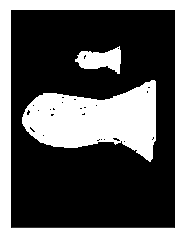

In [3]:
gwash = cv2.imread("cropped_fish_test.png") #import image
gwashBW = cv2.cvtColor(gwash, cv2.COLOR_BGR2GRAY) #change to grayscale


ret,thresh1 = cv2.threshold(gwashBW,0,255,cv2.THRESH_BINARY) #0 because we already cropped
kernel = np.ones((5,5),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(thresh1, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image

plt.imshow(closing, 'gray') #Figure 2
plt.xticks([]), plt.yticks([])
plt.show()


In [4]:
print("starting contour")
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation
print("end contour")

dst = np.zeros((closing.shape[1], closing.shape[0]),np.uint8)
        

print(contours)
cv2.drawContours(dst, contours, -1, (255, 255, 255), 1)
cv2.imshow('cleaner', dst) #Figure 3
cv2.waitKey(0)



starting contour
end contour
[array([[[628, 318]],

       [[627, 319]],

       [[625, 319]],

       ...,

       [[643, 331]],

       [[643, 320]],

       [[641, 318]]], dtype=int32), array([[[502, 587]],

       [[503, 586]],

       [[507, 586]],

       [[508, 587]],

       [[508, 591]],

       [[507, 592]],

       [[503, 592]],

       [[502, 591]]], dtype=int32), array([[[480, 586]],

       [[481, 585]],

       [[486, 585]],

       [[487, 586]],

       [[487, 590]],

       [[486, 591]],

       [[481, 591]],

       [[480, 590]]], dtype=int32), array([[[384, 584]],

       [[385, 583]],

       [[389, 583]],

       [[390, 584]],

       [[390, 588]],

       [[389, 589]],

       [[388, 589]],

       [[387, 590]],

       [[383, 590]],

       [[382, 589]],

       [[382, 585]],

       [[383, 584]]], dtype=int32), array([[[628, 581]],

       [[629, 580]],

       [[633, 580]],

       [[634, 581]],

       [[634, 585]],

       [[633, 586]],

       [[629, 586]],


-1

[[628 318]
 [627 319]
 [625 319]
 ...
 [643 331]
 [643 320]
 [641 318]]


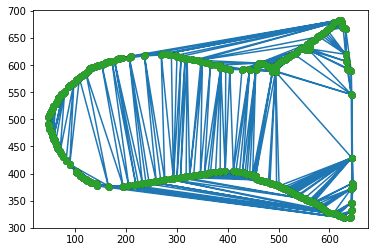

[[628 318]
 [627 319]
 [625 319]
 ...
 [620 682]
 [621 682]
 [622 682]]


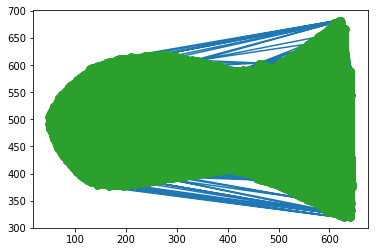

In [8]:
#Get only the largest area
areas = [] #list to hold all areas

for contour in contours:
  ar = cv2.contourArea(contour)
  areas.append(ar)

max_area = max(areas)
max_area_index = areas.index(max_area) #index of the list element with largest area

cnt = contours[max_area_index] #largest area contour

# cv2.drawContours(closing, [cnt], 0, (255, 255, 255), 3, maxLevel = 0)
# cv2.imshow('cleaner', closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
dst = np.zeros((closing.shape[1], closing.shape[0]),np.uint8)

format_contour_x = [x[0][0] for x in contours[max_area_index]]
format_contour_y = [x[0][1] for x in contours[max_area_index]]
plt.plot(format_contour_x, format_contour_y, 'o', color='black');


from scipy.spatial import Delaunay
zipped = list(zip(format_contour_x, format_contour_y))
zipped = np.array([list(x) for x in zipped])
print(zipped)
tri = Delaunay(zipped)
plt.triplot(zipped[:,0], zipped[:,1], tri.simplices)
plt.plot(zipped[:,0], zipped[:,1], 'o')
plt.show()

#Try filling in the points
zipped2 = list(zip(format_contour_x, format_contour_y))
for i in range(closing.shape[0]):
    for j in range(closing.shape[1]):
        inBBx = cv2.pointPolygonTest(contours[max_area_index], (j,i), False)
        if inBBx == 1: #inside
            zipped2.append([j,i])
        #else is 0 or -1 which is on edge or outside

zipped2 = np.array([list(x) for x in zipped2])
print(zipped2)
tri = Delaunay(zipped2)
plt.triplot(zipped2[:,0], zipped2[:,1], tri.simplices)
plt.plot(zipped2[:,0], zipped2[:,1], 'o')
plt.show()

# cv2.drawContours(dst, contours, max_area_index, (255, 255, 255), 1)
# cv2.imshow('cleaner2', dst) #Figure 3
# cv2.waitKey(0)

In [10]:
#I think since all we just format this into the format that the meshpoint cloud can take

normal = [0, 0, 1] 
normal_down = [0, 0, -1]
dummy_color = [0, 255, 255] #dummy color
dummy_neg_z = -5.0
dummy_pos_z = 5.0

data = []

#countours[max_area_index]
for x in zipped2:
    #print(x) #each is in a [[x y]] format
    points_neg = [x[0], x[1], dummy_neg_z, dummy_color[0], dummy_color[1], dummy_color[2], normal_down[0], normal_down[1], normal_down[2]]
    data.append(points_neg)
    points_pos = [x[0], x[1], dummy_pos_z, dummy_color[0], dummy_color[1], dummy_color[2], normal[0], normal[1], normal[2]]
    data.append(points_pos)
    



In [12]:
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
f = open("fish_text_points_w_normals.txt", "w")
f.write("X Y Z R G B Nx Ny Nz\n")
for i in data:
    str_ver =  map(str,i)
    f.write(' '.join(str_ver))
    f.write('\n')

f.close()